In [107]:
import pandas as pd
from rdkit import Chem
import numpy as np
import seaborn as sns
from descriptors.preprocessing import preprocess
from descriptors.dft_featurisation import *
import matplotlib.pyplot as plt

In [108]:
nicolit= pd.read_csv("data/NiCOlit.csv")
nicolit= preprocess(nicolit)

In [109]:
yield_ = []
for i, y in enumerate(nicolit.analytical_yield):
    if float(y) == float(y):
        float(y)
        yield_.append(float(y))
    else:
        yield_.append(float(nicolit.isolated_yield[i]))
    
nicolit['yield'] = yield_
nicolit["analytical_yield"] = [float(y) for y in nicolit.analytical_yield]

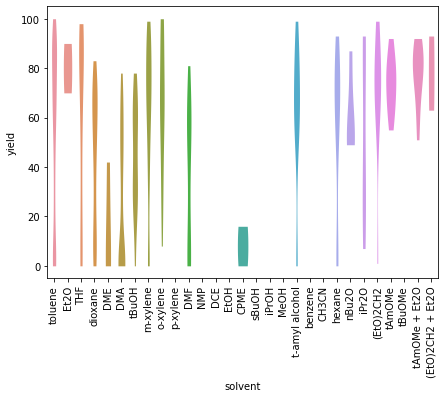

In [110]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
g = sns.violinplot(x="solvent", y='yield', data=nicolit, cut=0, ax=ax,
                  linewidth=0)
ax.tick_params(axis='x', rotation=90)

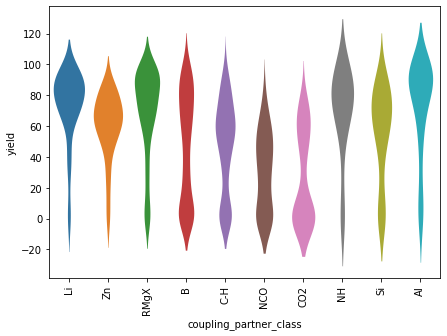

In [111]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
g = sns.violinplot(x="coupling_partner_class", y='yield', data=nicolit, cut=2, ax=ax,
                  linewidth=0)
ax.tick_params(axis='x', rotation=90)

In [112]:
from descriptors.dft_featurisation import process_dataframe_dft
nicolit_dft = process_dataframe_dft(nicolit, data_path = "data/utils/")

In [113]:
#try to get info on dft based descriptors for full and partial training.
#1. get dft featurisation with all parameters
#2. reduce the numbe of parameters
#3. get the percentage of the parameters the more involved

In [114]:
data_path = "data/utils/"

In [115]:
descritpors_to_remove_lig = ["number_of_atoms", "charge", "multiplicity", "molar_mass", "molar_volume", "E_scf", "zero_point_correction", "E_thermal_correction","H_thermal_correction", "G_thermal_correction", "E_zpe", "E", "H", "G", "stoichiometry", "converged", "ES_root_molar_volume", "ES_root_electronic_spatial_extent",
    "X_0", "X_1", "X_2", "X_3", "X_4", "X_5", "X_6", "X_7",
    "Y_0", "Y_1", "Y_2", "Y_3", "Y_4", "Y_5", "Y_6", "Y_7", 
    "Z_0", "Z_1", "Z_2", "Z_3", "Z_4", "Z_5", "Z_6", "Z_7",
    "at_0", "at_1", "at_2", "at_3", "at_4", "at_5", "at_6", "at_7",                   'ES_root_Mulliken_charge_0','ES_root_Mulliken_charge_1','ES_root_Mulliken_charge_2','ES_root_Mulliken_charge_3','ES_root_Mulliken_charge_4','ES_root_Mulliken_charge_5','ES_root_Mulliken_charge_6',
'ES_root_Mulliken_charge_7',
'ES_root_NPA_charge_0','ES_root_NPA_charge_1', 'ES_root_NPA_charge_2', 'ES_root_NPA_charge_3', 'ES_root_NPA_charge_4', 'ES_root_NPA_charge_5','ES_root_NPA_charge_6','ES_root_NPA_charge_7',
 'ES_root_NPA_core_0', 'ES_root_NPA_core_1', 'ES_root_NPA_core_2', 'ES_root_NPA_core_3', 'ES_root_NPA_core_4', 'ES_root_NPA_core_5', 'ES_root_NPA_core_6', 'ES_root_NPA_core_7',
 'ES_root_NPA_valence_0', 'ES_root_NPA_valence_1', 'ES_root_NPA_valence_2', 'ES_root_NPA_valence_3', 'ES_root_NPA_valence_4', 'ES_root_NPA_valence_5', 'ES_root_NPA_valence_6', 'ES_root_NPA_valence_7',
 'ES_root_NPA_Rydberg_0', 'ES_root_NPA_Rydberg_1', 'ES_root_NPA_Rydberg_2', 'ES_root_NPA_Rydberg_3', 'ES_root_NPA_Rydberg_4', 'ES_root_NPA_Rydberg_5', 'ES_root_NPA_Rydberg_6', 'ES_root_NPA_Rydberg_7',
 'ES_root_NPA_total_0', 'ES_root_NPA_total_1', 'ES_root_NPA_total_2', 'ES_root_NPA_total_3', 'ES_root_NPA_total_4', 'ES_root_NPA_total_5', 'ES_root_NPA_total_6', 'ES_root_NPA_total_7',
 'ES_transition_0', 'ES_transition_1', 'ES_transition_2', 'ES_transition_3', 'ES_transition_4', 'ES_transition_5', 'ES_transition_6', 'ES_transition_7', 'ES_transition_8', 'ES_transition_9',
 'ES_osc_strength_0', 'ES_osc_strength_1', 'ES_osc_strength_2', 'ES_osc_strength_3', 'ES_osc_strength_4', 'ES_osc_strength_5', 'ES_osc_strength_6', 'ES_osc_strength_7', 'ES_osc_strength_8', 'ES_osc_strength_9',
 'ES_<S**2>_0', 'ES_<S**2>_1', 'ES_<S**2>_2', 'ES_<S**2>_3', 'ES_<S**2>_4', 'ES_<S**2>_5', 'ES_<S**2>_6', 'ES_<S**2>_7', 'ES_<S**2>_8','ES_<S**2>_9']

descritpors_to_remove_ax = ["number_of_atoms", "charge", "multiplicity", "molar_mass", "molar_volume", "E_scf", "zero_point_correction", "E_thermal_correction","H_thermal_correction", "G_thermal_correction", "E_zpe", "E", "H", "G", "stoichiometry", "converged", "ES_root_molar_volume", "ES_root_electronic_spatial_extent",
                        "X_0", "X_1", "X_2", "X_3",
                        "Y_0", "Y_1", "Y_2", "Y_3",
                        "Z_0", "Z_1", "Z_2", "Z_3",
                        "at_0", "at_1", "at_2", "at_3",
                        'ES_root_Mulliken_charge_0', 'ES_root_Mulliken_charge_1', 'ES_root_Mulliken_charge_2', 'ES_root_Mulliken_charge_3',
                         'ES_root_NPA_charge_0', 'ES_root_NPA_charge_1', 'ES_root_NPA_charge_2', 'ES_root_NPA_charge_3',
                         'ES_root_NPA_core_0', 'ES_root_NPA_core_1', 'ES_root_NPA_core_2', 'ES_root_NPA_core_3', 
                         'ES_root_NPA_valence_0', 'ES_root_NPA_valence_1', 'ES_root_NPA_valence_2', 'ES_root_NPA_valence_3',
                         'ES_root_NPA_Rydberg_0', 'ES_root_NPA_Rydberg_1', 'ES_root_NPA_Rydberg_2', 'ES_root_NPA_Rydberg_3',
                         'ES_root_NPA_total_0', 'ES_root_NPA_total_1', 'ES_root_NPA_total_2', 'ES_root_NPA_total_3',
                         'ES_transition_0', 'ES_transition_1', 'ES_transition_2', 'ES_transition_3', 'ES_transition_4', 'ES_transition_5', 'ES_transition_6', 'ES_transition_7', 'ES_transition_8', 'ES_transition_9',
                         'ES_osc_strength_0', 'ES_osc_strength_1', 'ES_osc_strength_2', 'ES_osc_strength_3', 'ES_osc_strength_4', 'ES_osc_strength_5', 'ES_osc_strength_6', 'ES_osc_strength_7', 'ES_osc_strength_8', 'ES_osc_strength_9',
                         'ES_<S**2>_0', 'ES_<S**2>_1', 'ES_<S**2>_2', 'ES_<S**2>_3', 'ES_<S**2>_4', 'ES_<S**2>_5', 'ES_<S**2>_6', 'ES_<S**2>_7', 'ES_<S**2>_8', 'ES_<S**2>_9']
descritpors_to_remove_al = ["converged", "stoichiometry", "ES_root_molar_volume", "X_0", "Y_0", "Z_0", "at_0", "ES_transition_7", "ES_transition_8", "ES_transition_9", 'ES_osc_strength_7', 'ES_osc_strength_8', 'ES_osc_strength_9', 'ES_<S**2>_7', 'ES_<S**2>_8', 'ES_<S**2>_9']

def add_solvent_prop(nicolit, data_path):
    solv = pd.read_csv(data_path + "solvents.csv", sep = ',', index_col=0)
    for prop in solv.columns:
        list_prop = [solv[prop][solvent] for solvent in nicolit.solvent]
        nicolit[prop] = list_prop
        
def add_substrate_prop(nicolit, data_path):
    substrate = pd.read_csv(data_path + "substrate_dft.csv", sep = ',', index_col=0)
    substrate.drop(columns=descritpors_to_remove_lig, inplace=True)
    canon_rdkit = [Chem.CanonSmiles(smi_co) for smi_co in substrate.index.to_list() ]
    substrate["can_rdkit"] = canon_rdkit
    substrate.set_index("can_rdkit", inplace=True)
    substrate = substrate[substrate.duplicated(keep='first') != True]
    substrate = substrate[~substrate.index.duplicated(keep='first')]
    for prop in substrate.columns:
        sub_prop =str("sub_"+prop)
        list_prop = [substrate[prop][solvent] for solvent in nicolit.substrate]
        nicolit[sub_prop] = list_prop

def add_cp_prop(nicolit, data_path):
    AX = pd.read_csv(data_path + "AX_dft.csv", sep = ',', index_col=0)
    AX.drop(columns=descritpors_to_remove_ax, inplace=True)
    canon_rdkit = [Chem.CanonSmiles(smi_co) for smi_co in AX.index.to_list() ]
    AX["can_rdkit"] = canon_rdkit
    AX.set_index("can_rdkit", inplace=True)
    for prop in AX.columns:
        ax_prop =str("ax_"+prop)
        list_prop = [AX[prop][solvent] for solvent in nicolit.effective_coupling_partner]
        nicolit[ax_prop] = list_prop

def add_lig_prop(nicolit, data_path):
        # issue : what should we put for nan ? 
    ligs = pd.read_csv(data_path + "ligand_dft.csv", sep = ',', index_col=0)
    ligs.drop(columns=descritpors_to_remove_lig, inplace=True)
    ligs.index.to_list()
    canon_rdkit = []
    for smi in ligs.index.to_list():
        try:
            canon_rdkit.append(Chem.CanonSmiles(smi))
        except:
            canon_rdkit.append(smi)
    ligs["can_rdkit"] = canon_rdkit
    ligs.set_index("can_rdkit", inplace=True)
    for prop in ligs.columns:
        lig_prop =str("lig_"+prop)
        list_prop = [ligs[prop][solvent] for solvent in nicolit.effective_ligand]
        nicolit[lig_prop] = list_prop
        
def add_LA_prop(nicolit, data_path):
    AL = pd.read_csv(data_path + "AL_dft.csv", sep = ',', index_col=0)
    AL.drop(columns=descritpors_to_remove_al, inplace=True)
    canon_rdkit = []
    for smi in AL.index.to_list():
        try:
            canon_rdkit.append(Chem.CanonSmiles(smi))
        except:
            canon_rdkit.append(smi)
    AL["can_rdkit"] = canon_rdkit
    AL.set_index("can_rdkit", inplace=True)
    for prop in AL.columns:
        al_prop =str("al_"+prop)
        list_prop = [AL[prop][solvent] for solvent in nicolit["Lewis Acid"]]
        nicolit[al_prop] = list_prop

def choose_yield(nicolit):
    yield_ = []
    for i, y in enumerate(nicolit.analytical_yield):
        if float(y) == float(y):
            float(y)
            yield_.append(float(y))
        else:
            yield_.append(float(nicolit.isolated_yield[i]))
    
    nicolit['yield'] = yield_

In [116]:
def feat_dft_nicolit(nicolit, data_path):
    # attention no precursor and no origin
    add_solvent_prop(nicolit, data_path)
    add_substrate_prop(nicolit, data_path)
    add_cp_prop(nicolit, data_path)
    add_lig_prop(nicolit, data_path)
    add_LA_prop(nicolit,data_path)
    nicolit.time = times(nicolit)
    nicolit.temperature = temperatures(nicolit)
    nicolit[['eq_substrate','eq_coupling_partner', 'eq_catalyst', 'eq_ligand','eq_reagent']] = equivalents(nicolit)
    choose_yield(nicolit)

In [117]:
nicolit = pd.read_csv("data/NiCOlit.csv")
nicolit = preprocess(nicolit)

In [118]:
feat_dft_nicolit(nicolit,data_path=data_path)

/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_15961/60898445.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  nicolit[ax_prop] = list_prop
/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_15961/60898445.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  nicolit[lig_prop] = list_prop
/var/folders/c8/7pbzw0r912n01vr9fgdmzhx00000gn/T/ipykernel_15961/60898445.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

In [119]:
nicolit_float = nicolit.select_dtypes(include=[np.float64])
from sklearn.metrics import r2_score

nicolit_float.drop(columns=['isolated_yield', 'polarisabilite', 'Unnamed: 9'], inplace=True)

# scale Nicolit_float:
scaler = StandardScaler()
X = nicolit_float.values
print(np.shape(X))
print(np.shape(nicolit_float))
X = scaler.fit_transform(X)
nicolit_float[nicolit_float.columns] = X

(1406, 292)
(1406, 292)


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [120]:
# count columns by type
eq = 0
cp = 0
lig = 0
sub = 0
al = 0
for col in nicolit_float.columns:
    if 'eq_' in col:
        eq += 1
    elif 'ax_' in col:
        cp += 1
    elif 'lig_' in col:
        lig += 1
    elif 'sub_' in col:
        sub += 1
    elif 'al_' in col:
        al += 1
    else:
        print(col)
        
print("eq =", eq, "sub =", sub, "cp =", cp, "lig =", lig, "al =", al )       

time
temperature
T ebullition
T fusion
Permittivite
Moment dipolaire
donneur de liaison hydrogene
accepteur de liaison
hydrogene
yield
eq = 5 sub = 87 cp = 47 lig = 87 al = 56


In [121]:
for prop in nicolit_float.columns:
    if r2_score(nicolit_float[prop], nicolit_float['yield']) > -0.5:
        print(prop , r2_score(nicolit_float[prop], nicolit_float['yield']))

ax_homo_energy -0.428114534893244
ax_ES_root_dipole -0.45666114001358826
ax_NPA_charge_0 -0.46360624702174613
ax_NPA_valence_1 -0.30610545818509927
al_ES_root_dipole -0.49139008286316166
al_NPA_charge_0 -0.40092694573679344
yield 1.0


In [122]:
from analysis import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#reducing the parameters:

def perf_param(df, param_list):
    test = select_parameters(df, param_list)
    return perf(test, iterations=10)

def select_parameters(df, param_list):
    param_list.append('yield')
    return df[param_list]

def perf(test_1, iterations=10):
    scores = []
    for i in range(iterations):
        X = test_1.drop(columns=['yield']).values
        y = test_1['yield']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        regr = RandomForestRegressor()
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    return np.mean(scores), np.std(scores)

In [123]:
param1 = ['time', 'temperature']
perf_param(nicolit_float, param1)

(0.19402195109883727, 0.0023277469969009393)

In [124]:
param2 = ['time', 'temperature','eq_substrate', 'eq_coupling_partner','eq_catalyst', 'eq_ligand', 'eq_reagent']
perf_param(nicolit_float, param2)

(0.4009899193466716, 0.004569622551671085)

In [125]:
param3_to_add = ['ax_lumo_energy', 'ax_homo_energy', 'sub_lumo_energy', 'sub_homo_energy', 'sub_VBur_0', 
                'ax_VBur_0']
param3 = param2 + param3_to_add
print(param3)
perf_param(nicolit_float, param3)

['time', 'temperature', 'eq_substrate', 'eq_coupling_partner', 'eq_catalyst', 'eq_ligand', 'eq_reagent', 'yield', 'ax_lumo_energy', 'ax_homo_energy', 'sub_lumo_energy', 'sub_homo_energy', 'sub_VBur_0', 'ax_VBur_0']


(0.400712583567845, 0.004489238138369208)

In [126]:
param4_to_add = ['ax_lumo_energy', 'ax_homo_energy', 'ax_VBur_0',
                 'sub_lumo_energy', 'sub_homo_energy', 'sub_VBur_0', 
                 'lig_homo_energy', 'lig_lumo_energy', 'lig_VBur_0', 'lig_VBur_1',
                'al_lumo_energy', 'al_lumo_energy']
param4 = param2 + param4_to_add
print(param3)
perf_param(nicolit_float, param3)

['time', 'temperature', 'eq_substrate', 'eq_coupling_partner', 'eq_catalyst', 'eq_ligand', 'eq_reagent', 'yield', 'ax_lumo_energy', 'ax_homo_energy', 'sub_lumo_energy', 'sub_homo_energy', 'sub_VBur_0', 'ax_VBur_0', 'yield']


(0.4016552933013832, 0.004050253212578342)

In [127]:
# global feature importance:
from sklearn.inspection import permutation_importance
regr = RandomForestRegressor()
X = nicolit_float.drop(columns=['yield']).values
y = nicolit_float['yield']
regr.fit(X,y)
pi = permutation_importance(regr, X, y, 
                            scoring=None, 
                            n_repeats=20,
                            max_samples=1.0)

In [128]:
# get dataframe with importances
df_dict_full = {}
values = []
L = nicolit_float.columns.to_list()
L.remove('yield')
df_dict_full.update({'full':pd.DataFrame.from_dict(data=pi, orient='index', columns=L)})

In [129]:
def principal_components(pi, L):
    restr_L   = []
    restr_imp = []
    restr_std = []
    for i,imp in enumerate(pi['importances_mean']):
        if imp > 0.01:
            restr_L.append(L[i])
            restr_imp.append(100*imp)
            restr_std.append(100*pi['importances_std'][i])
    plt.barh(restr_L, restr_imp, xerr = restr_std)
    plt.xticks()
    plt.xlabel("importance relative (%)")
    plt.show() 
    return restr_L, restr_imp, restr_std,

<class 'list'> <class 'numpy.ndarray'>


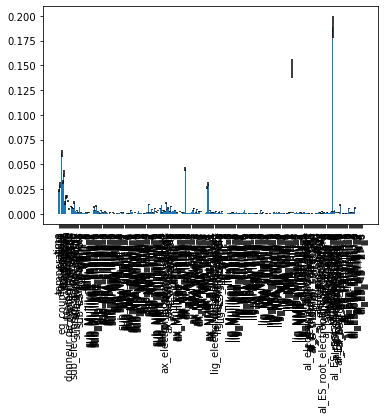

In [130]:
# plot all importances
L = list(nicolit_float.columns)
L.remove('yield')

print(type(L), type(pi['importances_mean']))
plt.bar(L, pi['importances_mean'], yerr = pi['importances_std'])
plt.xticks(rotation=90)
plt.show()

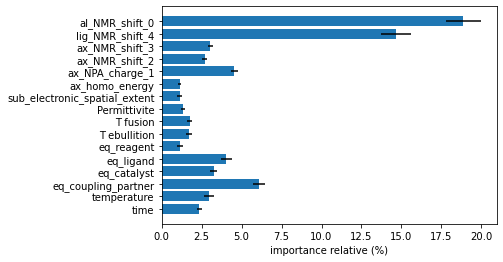

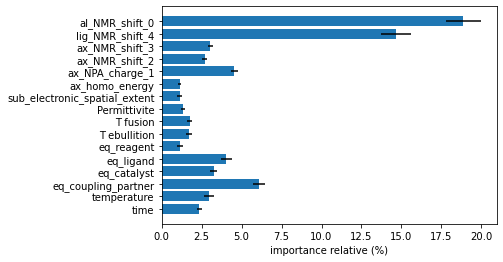

In [131]:
# plot strong importances
restr_L, r_imp, r_std = principal_components(pi, L)

fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)
ax.barh(restr_L, r_imp, xerr = r_std)
ax.set_xlabel("importance relative (%)")

fig.savefig("imp_rel_full.png", dpi=300, bbox_inches='tight')

In [454]:
# performance en prenant les composantes qui representent + de 1% 
param = restr_L
perf_param(nicolit_float, param)

(0.4676209728633146, 0.004592806585847989)

In [59]:
# test des mean importance par type de coupling partner
coupling_partner_classes = nicolit.coupling_partner_class.unique()
print(coupling_partner_classes)

['Li' 'Zn' 'RMgX' 'B' 'C-H' 'NCO' 'CO2' 'NH' 'Si' 'Al']


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


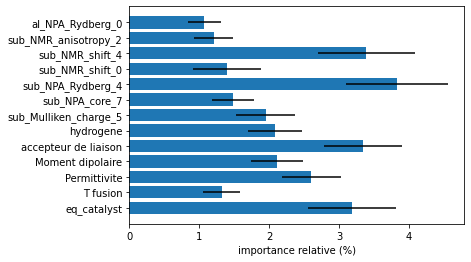

Li


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


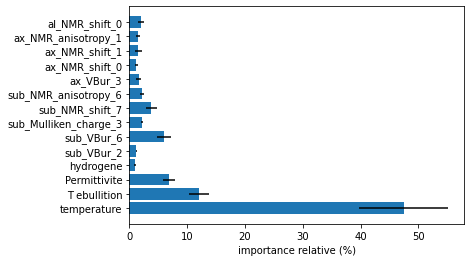

Zn


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


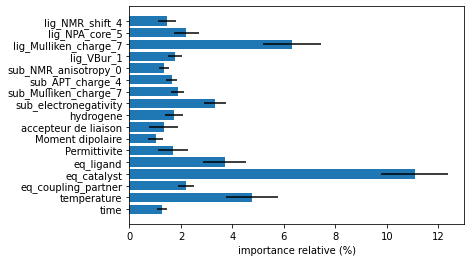

RMgX


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


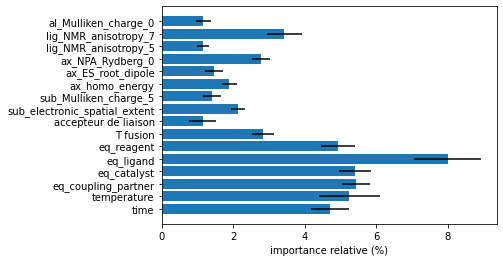

B


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


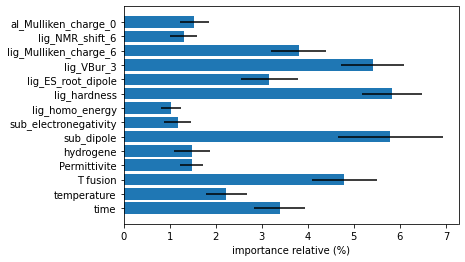

C-H


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


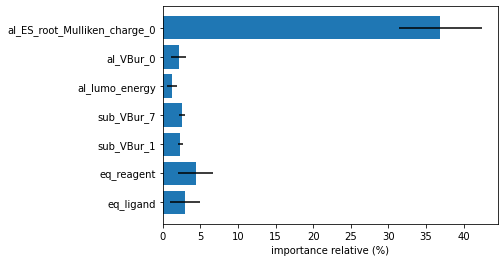

NCO


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


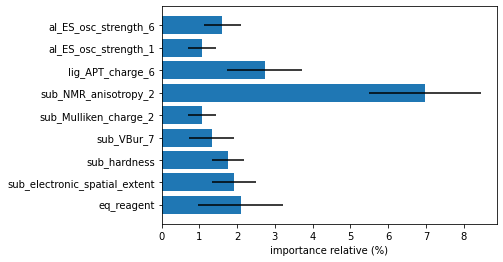

CO2


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


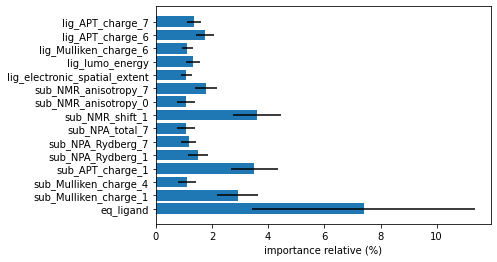

NH


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


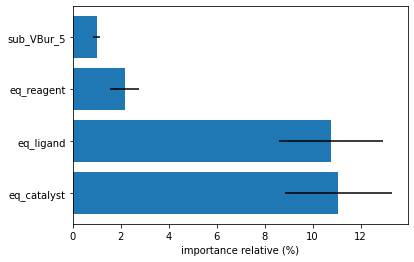

Si


/usr/local/anaconda3/envs/dft_for_sm/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


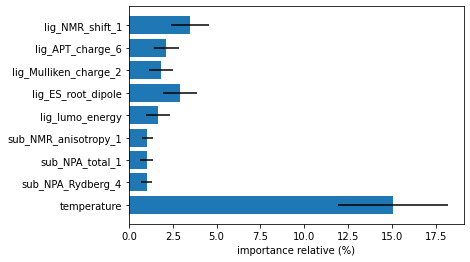

Al


In [61]:
Pi = []
R = []
for cp in coupling_partner_classes:
    nicolit_restr = nicolit[nicolit['coupling_partner_class'] == cp]
    nicolit_float = nicolit_restr.select_dtypes(include=[np.float64])
    nicolit_float.drop(columns=['isolated_yield', 'polarisabilite', 'Unnamed: 9'], inplace=True)
    regr = RandomForestRegressor()
    X = nicolit_float.drop(columns=['yield']).values
    y = nicolit_float['yield']
    regr.fit(X,y)
    pi = permutation_importance(regr, X, y, 
                            scoring=None, 
                            n_repeats=20, max_samples=1.0)
    Pi.append(pi)
    PC = principal_components(pi, L)
    print(cp)
    perf_param(nicolit_float, PC[0])
    R.append(PC)
    


In [62]:
# get dataframe with importances
df_dict = {}
values = []
L = nicolit_float.columns.to_list()
L.remove('yield')
for j, cp  in enumerate(coupling_partner_classes):
    df_dict.update({cp:pd.DataFrame.from_dict(data=Pi[j], orient='index', columns=L)})

In [63]:
Pi_2 = Pi

In [92]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [142]:
# Radar plot for mean importance in model for each model
#1.  display attributes and classes
nicolit_float.columns
tt = ['time', 'temperature']
sol = ['T ebullition', 'T fusion', 'Permittivite','Moment dipolaire',
       'donneur de liaison hydrogene', 'accepteur de liaison', 'hydrogene']
eq = [i for i in nicolit_float.columns if 'eq_' in i]
sub = [i for i in nicolit_float.columns if 'sub_' in i]
ax = [i for i in nicolit_float.columns if 'ax_' in i]
lig = [i for i in nicolit_float.columns if 'lig_' in i]
al = [i for i in nicolit_float.columns if 'al_' in i]

comps = ['tt', 'solvent', 'molar ratios', 'substrate', 'coupling partner',
        'ligand', 'lewis acid']


#2.  plot radar plot for one model
dict_summarized = {}
# example on Boron:

def get_radars(cp, df_dict):
    radar_mean = []
    for comp in [tt, sol, eq, sub, ax, lig, al]:   
        mean_imp_comp = np.sum(df_dict[cp][comp].loc['importances_mean'])
        radar_mean.append(mean_imp_comp)

    all_tests = df_dict[cp][comp].loc['importances']
    all_radars =[]
    for i in range(20):
        radar_single = []
        for comp in [tt, sol, eq, sub, ax, lig, al]:   
            mean_imp_comp = df_dict[cp][comp].loc['importances']
            comp_single = np.sum([mean_imp_comp[j][i] for j in range(np.shape(mean_imp_comp)[0])])
            radar_single.append(comp_single)
        all_radars.append(radar_single)
    
    return radar_mean, all_radars

    
#3.  plot radar plot for all models


In [143]:
Boron_radar, all_radars = get_radars(cp='B', df_dict=df_dict)

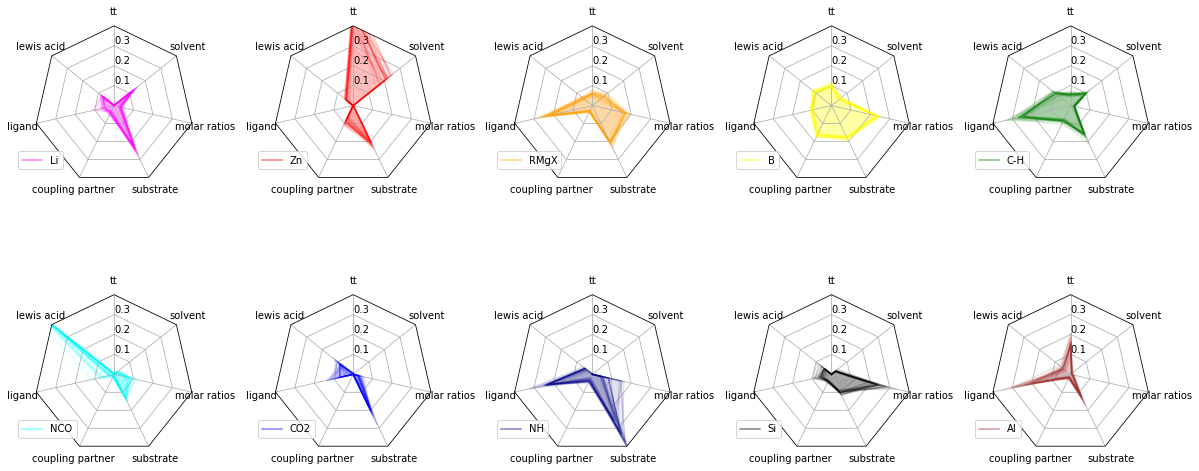

In [179]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

nrows = 2
ncols = np.trunc(len(coupling_partner_classes)/2)

# number of variable
categories=comps
N = len(categories)
# Initialise the spider plot
theta = radar_factory(N, frame='polygon')


fig, axs = plt.subplots(figsize=(20, 8), nrows=2, ncols=5,
                            subplot_kw=dict(projection='radar'))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
 
def plot_radar(cp, ax, color, df_dict=df_dict):
    radar, all_radars = get_radars(cp, df_dict=df_dict)
    ax.plot(theta, radar, color=color, alpha=0.5, label=cp)
    for i in range(len(all_radars)):
        ax.plot(theta, all_radars[i], color=color, alpha=0.1)
        ax.fill(theta, all_radars[i], color=color, alpha=0.02)
    ax.set_rgrids([0.1, 0.2, 0.3])
    ax.set_rlim([0,0.4])
    ax.set_rlabel_position(0.1)
    ax.set_varlabels(categories)
    ax.set_rlabel_position(0)    
    ax.set_theta_direction(-1)
    ax.legend(loc=[-0.1,0.1])

colors= ['magenta', 'red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'Darkblue',
        'black', 'brown']

for i, cp  in enumerate(coupling_partner_classes):
    if i < 5:
        ncol = i
        nrow =0
    else:
        ncol = i-5
        nrow=1
    plot_radar(cp=cp, ax=axs[nrow, ncol], color=colors[i], df_dict=df_dict)

fig.subplots_adjust(wspace=0.5, hspace=0.40, top=0.85, bottom=0.05)

plt.show()

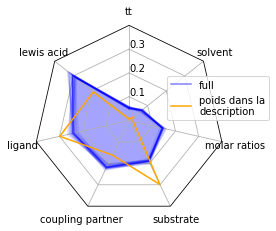

In [180]:
# number of variable
categories=comps
N = len(categories)
# Initialise the spider plot
theta = radar_factory(N, frame='polygon')

fig, axs = plt.subplots(figsize=(3.5, 3.5), nrows=1, ncols=1,
                            subplot_kw=dict(projection='radar'))

plot_radar('full', axs, 'blue', df_dict_full)

axs.plot(theta, np.array([2, 7, 5, 87, 47, 87, 56])/291, color='orange', alpha=1, label='poids dans la\ndescription')
axs.legend(loc=[0.7,0.5])

fig.savefig("radar_full_model.png", dpi = 300, bbox_inches='tight')

In [ ]:
#Visualization of the chemistry of the dataset

In [74]:
regr = RandomForestRegressor()
X = nicolit_float.drop(columns=['yield']).values
y = nicolit_float['yield']
regr.fit(X,y)

RandomForestRegressor()

In [75]:
# Faire les diagrammes croises par count
nicolit= pd.read_csv("data/NiCOlit.csv")
nicolit= preprocess(nicolit)

In [76]:
# DFT Ligands
ligs = pd.read_csv("data/utils/ligand_dft.csv", sep =',', index_col=0)
ligs.drop(columns=descritpors_to_remove_lig, inplace=True)
ligs.index.to_list()
canon_rdkit = []
for smi in ligs.index.to_list():
    try:
        canon_rdkit.append(Chem.CanonSmiles(smi))
    except:
        canon_rdkit.append(smi)
ligs["can_rdkit"] = canon_rdkit
ligs.set_index("can_rdkit", inplace=True)
# scale:
scaler = StandardScaler()
X = ligs.values
X = scaler.fit_transform(X)
ligs[ligs.columns] = X

In [77]:
smi_ligs = nicolit.effective_ligand.unique()
dft_ligs = []
for smi in smi_ligs:
    dft_ligs.append(list(ligs.loc[smi]))

In [78]:
Phos = []
DiPhos = []
others = []
NHC = []
colors = []
for smi in smi_ligs:
    if 'P' in smi:
        if smi.count('P') == 1:
            Phos.append(smi)
            colors.append('blue')
        else:
            DiPhos.append(smi)
            colors.append('Darkblue')
    elif '[C]' in smi:
        NHC.append(smi)
        colors.append('red')
    else:
        others.append(smi)
        colors.append('black')

In [79]:
from sklearn.manifold import TSNE
X = np.array(dft_ligs)
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  perplexity =6,
                init='random').fit_transform(X)


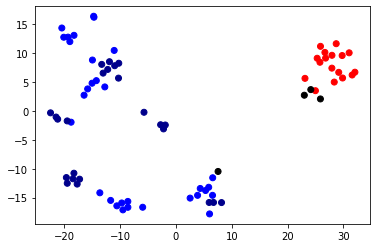

In [80]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=colors)
plt.show()

In [81]:
# plot counts of combinations between cc and ligands:
ligand_cat = ['Phos' ,'DiPhos', 'NHC', 'others']
cc = nicolit.coupling_partner_class.unique()
lig_cat = []
for smi in nicolit.effective_ligand:
    if 'P' in smi:
        if smi.count('P') == 1:
            lig_cat.append('Phos')
        else:
            lig_cat.append('DiPhos')
    elif '[C]' in smi:
        lig_cat.append('NHC')
    else:
        lig_cat.append('others')
        
nicolit['ligand_cat'] = lig_cat

m = np.zeros((len(ligand_cat), len(cc)))
mask = np.ones_like(m)
for i in range(np.shape(m)[0]):
    nicolit_lig = nicolit[nicolit['ligand_cat'] == ligand_cat[i]]
    for j in range(np.shape(m)[1]):
        num_cc = len(nicolit[nicolit['coupling_partner_class']==cc[j]])
        m[i][j] = len(nicolit_lig[nicolit_lig['coupling_partner_class']==cc[j]])/num_cc
        if m[i][j] != 0:
            mask[i][j] = 0

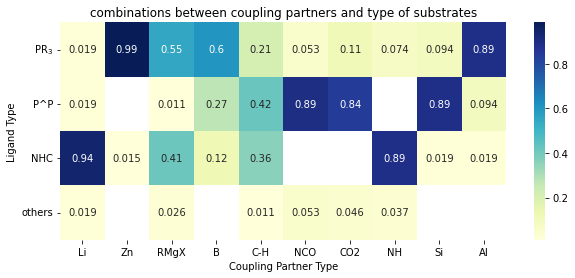

In [82]:
fig = plt.figure(figsize=(10,4))
ax = plt.subplot(111)
sns.heatmap(m, ax=ax, annot=True, cmap="YlGnBu", mask=mask)
ax.set_xticklabels(cc)
ax.set_yticklabels(['PR$_3$', 'P^P', 'NHC', 'others'])
ax.set_ylabel("Ligand Type")
ax.set_xlabel("Coupling Partner Type")
ax.tick_params(axis='y', rotation=0)
plt.title("combinations between coupling partners and type of substrates")
plt.show()

In [83]:
# substrate classification:

In [84]:
mols = [Chem.MolFromSmiles(smi) for smi in nicolit.substrate]
sub_class = []
for mol in mols:
    if mol.HasSubstructMatch(Chem.MolFromSmiles('c1ncncn1')) or mol.HasSubstructMatch(Chem.MolFromSmiles('C1=NC=NC=N1')):
        sub_class.append('Otriazine')
    elif mol.HasSubstructMatch(Chem.MolFromSmiles('OC(=O)C(C)(C)C')):
        sub_class.append('OPiv')
    elif mol.HasSubstructMatch(Chem.MolFromSmiles('OC(=O)N')):
        sub_class.append('OC(=O)N')
    elif mol.HasSubstructMatch(Chem.MolFromSmiles('OC(=O)O')):
        sub_class.append('OC(=O)O')
    elif mol.HasSubstructMatch(Chem.MolFromSmiles('O[Si](C)(C)C')) or mol.HasSubstructMatch(Chem.MolFromSmarts('o[Si](C)(C)C')):
        sub_class.append('OSi(C)(C)C')
    else:
        mol = Chem.AddHs(mol)
        if mol.HasSubstructMatch(Chem.MolFromSmiles('OC(=O)C([H])([H])[H]')):
            sub_class.append('OAc')
        elif mol.HasSubstructMatch(Chem.MolFromSmiles('c1ccccc1Oc1ccccc1')):
            sub_class.append('OPh')
        elif mol.HasSubstructMatch(Chem.MolFromSmiles('OCOC')):
            sub_class.append('OCOC')
        elif mol.HasSubstructMatch(Chem.MolFromSmiles('OC([H])([H])[H]')):
            sub_class.append('OCH3')
        else:
            sub_class.append('others')           
sub_classes = np.unique(sub_class)

In [85]:
# Check categories
mol_others = []
#print(len(sub_class))
for i, sub in enumerate(sub_class):
    if sub == 'Otriazine':
        mol_others.append(mols[i])
        
#print(len(mol_others))
#Draw.MolsToGridImage(mol_others, maxMols=200)

In [86]:
nicolit['substrate_cat'] = sub_class

In [87]:
m = np.zeros((len(sub_classes), len(cc)))
mask = np.ones((len(sub_classes), len(cc)))
for i in range(np.shape(m)[0]):
    nicolit_sub = nicolit[nicolit['substrate_cat'] == sub_classes[i]]
    for j in range(np.shape(m)[1]):
        num_cc = len(nicolit[nicolit['coupling_partner_class']==cc[j]])
        m[i][j] = len(nicolit_sub[nicolit_sub['coupling_partner_class']==cc[j]])/num_cc
        if m[i][j] != 0:
            mask[i][j] = 0

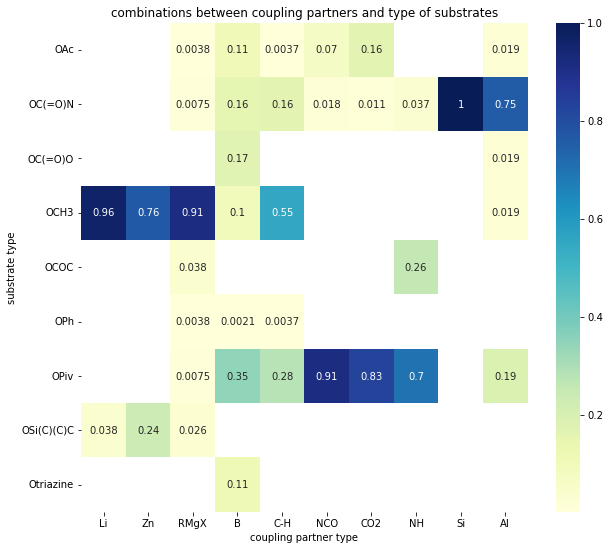

In [88]:
fig = plt.figure(figsize=(10,9))
ax = plt.subplot(111)

sns.heatmap(m, ax=ax, annot=True, cmap="YlGnBu", mask=mask)
ax.set_xticklabels(cc)
ax.set_xlabel("coupling partner type")
ax.set_yticklabels(sub_classes)
ax.set_ylabel("substrate type")
ax.tick_params(axis='y', rotation=0)
plt.title("combinations between coupling partners and type of substrates")
plt.show()

In [89]:
m = np.zeros((len(ligand_cat), len(sub_classes)))
mask = np.ones_like(m)
for i in range(np.shape(m)[0]):
    nicolit_sub = nicolit[nicolit['ligand_cat'] == ligand_cat[i]]
    for j in range(np.shape(m)[1]):
        num_cc = len(nicolit[nicolit['substrate_cat']==sub_classes[j]])
        m[i][j] = len(nicolit_sub[nicolit_sub['substrate_cat']==sub_classes[j]])/num_cc
        if m[i][j] != 0:
            mask[i][j] = 0

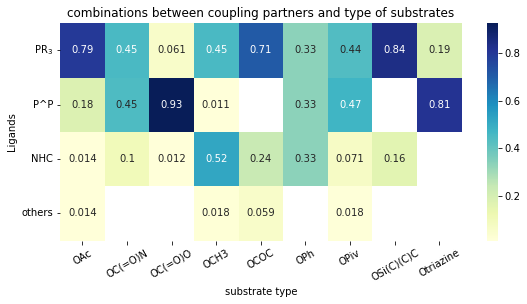

In [90]:
fig = plt.figure(figsize=(9,4))
ax = plt.subplot(111)

sns.heatmap(m, ax=ax, annot=True, cmap="YlGnBu", mask=mask)
ax.set_yticklabels(ligand_cat)
ax.set_ylabel("Ligands")
ax.set_yticklabels(['PR$_3$', 'P^P', 'NHC', 'others'])
ax.set_xticklabels(sub_classes)
ax.set_xlabel("substrate type")
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='x', rotation=30)
plt.title("combinations between coupling partners and type of substrates")
plt.show()

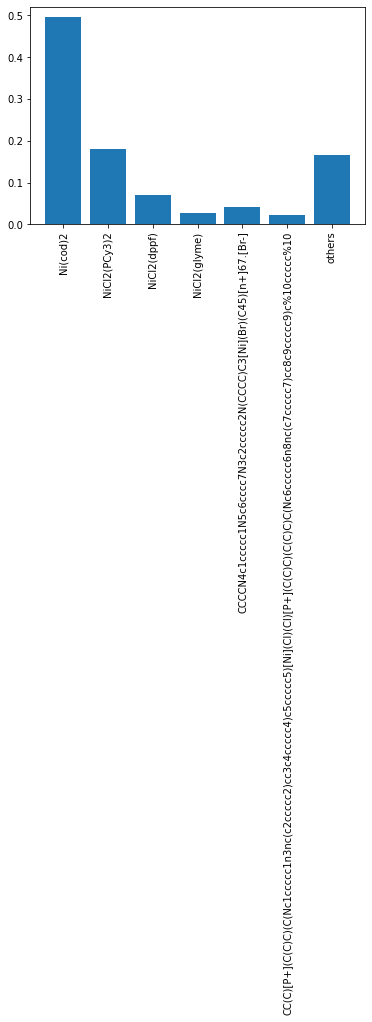

In [91]:
#precursors
precs = nicolit.catalyst_precursor.unique()
counts = []
precs= list(precs)
precs[1] = 'No_precursor'
for prec in precs:
    counts.append(nicolit.catalyst_precursor.to_list().count(prec))
counts = np.array(counts)

main_counts = []
mains_precs = []
for i, c in enumerate(counts):
    if c > 29:
        main_counts.append(c/np.sum(counts))
        mains_precs.append(precs[i])

main_counts.append((np.sum(counts)-np.sum(main_counts)*np.sum(counts))/np.sum(counts))
mains_precs.append('others')
        
plt.bar(x=mains_precs, height=main_counts)
plt.xticks(rotation=90)
plt.show()